# Importing the required libraries

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
import os
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# Loading the data

In [17]:
X= []
y= []
os.chdir(r'C:\Users\Diksha Menghmalani\Desktop\study material\College Material\TY\mini_project\finger_data_3600images')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    img = cv2.resize(img,(128,128))
    X.append(img)
    y.append(i[-6])

100%|██████████████████████████████████████| 3600/3600 [01:36<00:00, 37.36it/s]


In [64]:
X= np.array(X)
y = np.array(y,dtype = 'int')

In [65]:
y[:10]

array([5, 5, 3, 5, 5, 4, 2, 4, 5, 4])

### Train, Test, Validation Split
---

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2,random_state= 1)

In [68]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y,test_size= 0.25,random_state= 1)

In [69]:
X_train.shape

(2700, 128, 128, 3)

In [70]:
y_train.shape

(2700,)

### Display a random image
---

5

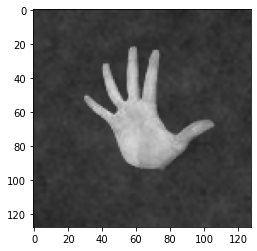

In [71]:
i = np.random.randint(1,len(X_train))
plt.imshow(X_train[i])
y_train[i]


### Display 25 randomly selected images
---

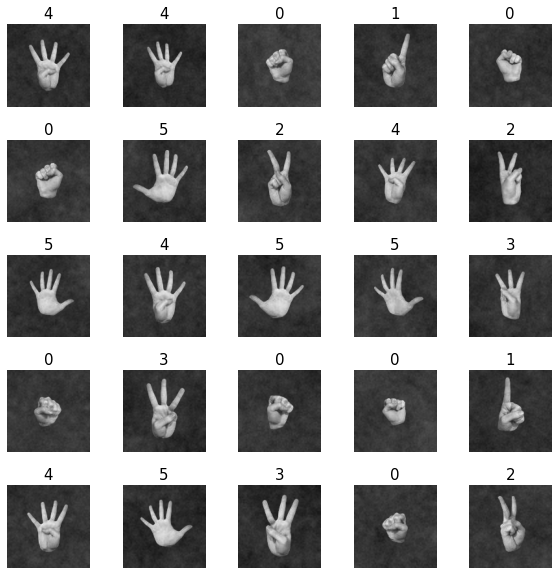

In [72]:
W_grid = 5
L_grid = 5

fig,axes = plt.subplots(L_grid,W_grid,figsize= (10,10))

axes = axes.ravel()
n_training= len(X_train)

for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize = 15)
    axes[i].axis('off')
    
    
plt.subplots_adjust(hspace= 0.4)

# Converting images to gray scale

In [73]:
X_train_gray = np.sum(X_train/3,axis=3,keepdims = True)
X_test_gray = np.sum(X_test/3,axis = 3,keepdims = True)
X_validation_gray = np.sum(X_validation/3,axis = 3,keepdims = True)

128

# Normalizing the data

In [74]:
X_train_gray_norm = (X_train_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128
X_validation_gray_norm = (X_validation_gray-128)/128

# Building the Convolutional Neural Network

In [75]:
from tensorflow.keras import datasets,layers,models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation = 'relu',input_shape = (128,128,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5),activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(6, activation = 'sigmoid'))
CNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 124, 124, 6)       156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 62, 62, 6)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 62, 62, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 58, 58, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 29, 29, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 13456)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)              

In [76]:
CNN.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [77]:
history = CNN.fit(X_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 5,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Train on 2700 samples, validate on 900 samples
Epoch 1/5
2700/2700 [==============================] - 23s 8ms/sample - loss: 1.7382 - acc: 0.2726 - val_loss: 1.5538 - val_acc: 0.7156
Epoch 2/5
2700/2700 [==============================] - 22s 8ms/sample - loss: 1.2381 - acc: 0.7389 - val_loss: 0.5996 - val_acc: 0.9189
Epoch 3/5
2700/2700 [==============================] - 22s 8ms/sample - loss: 0.5245 - acc: 0.8359 - val_loss: 0.3073 - val_acc: 0.9167
Epoch 4/5
2700/2700 [==============================] - 22s 8ms/sample - loss: 0.2755 - acc: 0.9122 - val_loss: 0.1579 - val_acc: 0.9522
Epoch 5/5
2700/2700 [==============================] - 22s 8ms/sample - loss: 0.1673 - acc: 0.9422 - val_loss: 0.1029 - val_acc: 0.9667


In [78]:
score = CNN.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy: {} %'.format(score[1]*100))

720/720 [==============================] - 2s 3ms/sample - loss: 0.1098 - acc: 0.9639
Test Accuracy: 96.38888835906982 %


In [79]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [80]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

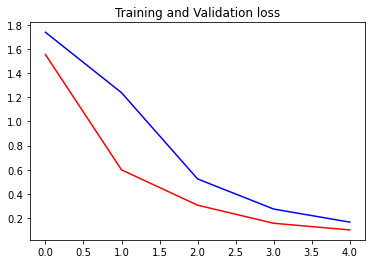

In [81]:
epochs = range(len(accuracy))
plt.plot(epochs, loss,'b',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title('Training and Validation loss')
         

Text(0.5, 1.0, 'Training and Validation Accuracy')

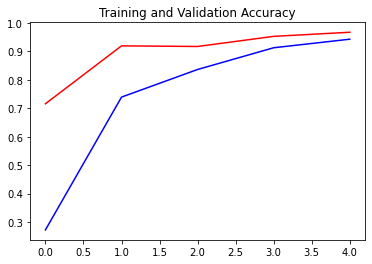

In [82]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'b',label = 'Training Accuracy')
plt.plot(epochs,val_accuracy,'r',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
         

### Confusion Matrix
---

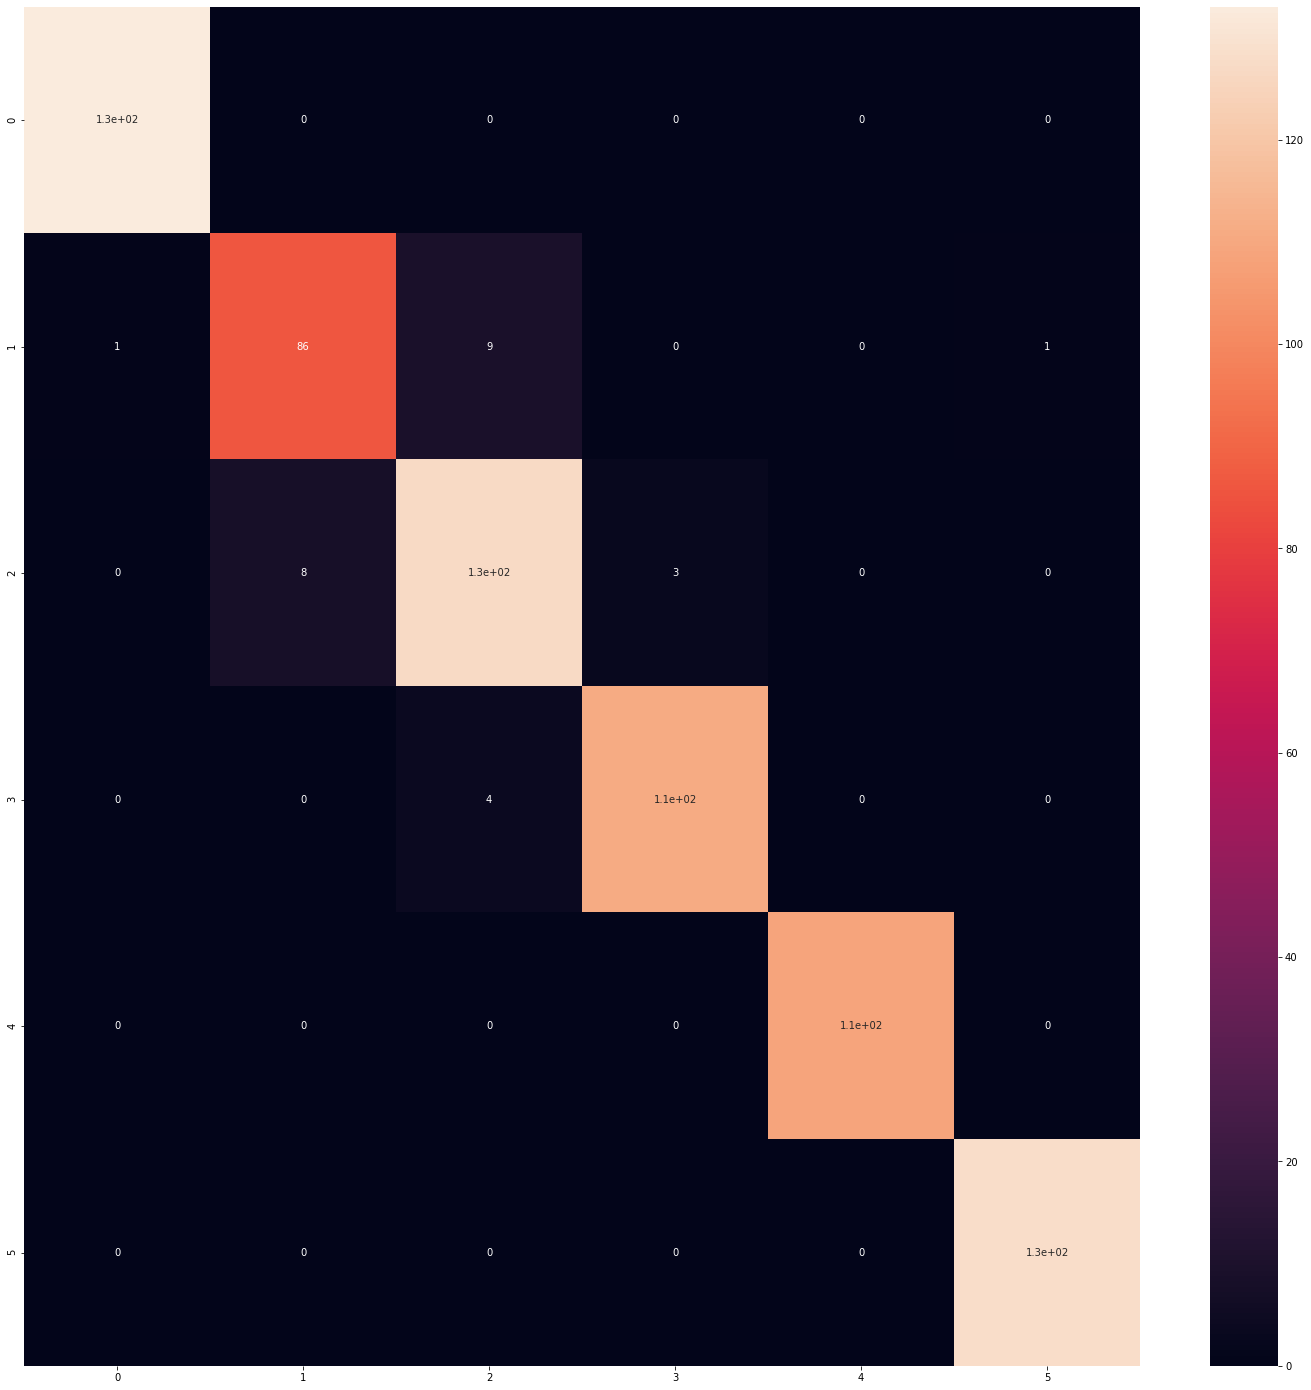

In [83]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predicted_classes)
plt.figure(figsize= (25,25))
sns.heatmap(cm, annot = True)

### Plotting 25 randomly selected images with the label and predicted label
---

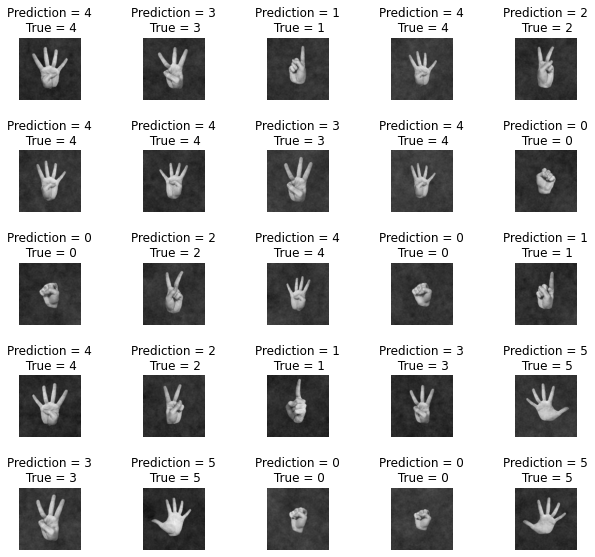

In [88]:
W = 5
L = 5

fig,axes = plt.subplots(L,W,figsize= (10,10))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)